In [20]:
import numpy as np
import matplotlib.pyplot as plt
from procesadoDatosDemandaString import procesar_datos_string 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [22]:
datos = procesar_datos_string()
datos

Archivo donde están los datos de la demanda (sin extensión): demanda


In [23]:
datos = datos.T
labels = list(datos.index)

In [25]:
datos = datos.to_numpy()

In [26]:
datos = normalize(datos)

In [27]:
len(datos[0])

1095

In [65]:
score_list = []
maximo = (0,0)
for x in range(2,23):
    clusterer = KMeans(n_clusters=x, random_state=1)
    cluster_labels = clusterer.fit_predict(datos)
    score = silhouette_score(datos, cluster_labels)
    score_list.append(score)
    if score > maximo[1]:
        maximo = (x, score)

<BarContainer object of 21 artists>

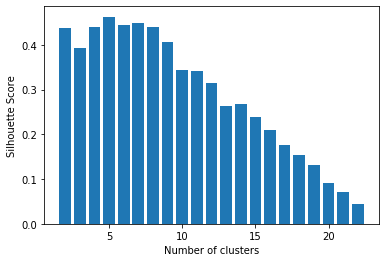

In [66]:
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.bar([i for i in range(2,23)], score_list)
print("El maximo se obtiene en el nodo {} con una puntuacion de {}".format(maximo[0], maximo[1]))

In [ ]:
# y_pred te da a que cluster pertenece cada dia
# y_pred = KMeans(n_clusters=4, random_state=1).fit_predict(datos)

# len(y_pred)

#hora_cluster = {}
#for i in range(len(labels)):
#    hora_cluster[labels[i]] = y_pred[i]

#hora_cluster

#plt.figure(figsize=(10, 10))
#plt.scatter(hora_cluster.keys(), hora_cluster.values(), c=y_pred)